# Домашнее задание по статистическому анализу на python

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [6]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [7]:
df.head()
df_fr = df[~np.isnan(df.Freedom)]
df_fr.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

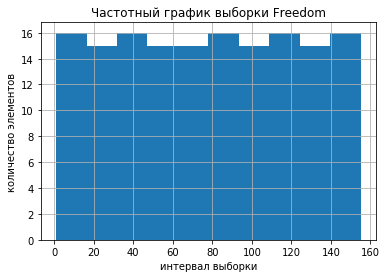

частотный график Freedom можно отнести к равномерному распределению


In [33]:
plt.hist(df_fr['Freedom'],10)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки Freedom')
plt.grid(True)
plt.show()
print('частотный график Freedom можно отнести к равномерному распределению')

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

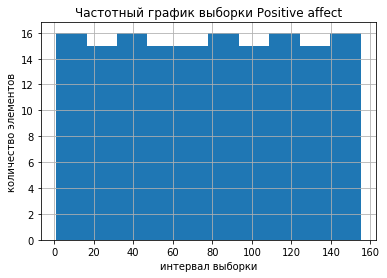

частотный график Positive affect можно отнести к равномерному распределению


In [34]:
plt.hist(df_fr['Positive affect'],10)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки Positive affect')
plt.grid(True)
plt.show()
print('частотный график Positive affect можно отнести к равномерному распределению')

In [11]:
#математическое ожидание
print('Математическое ожидание:', statistics.mean(df_fr.Freedom))
print('Медиана: ', statistics.median(df_fr.Freedom))
print('Минимум:', min(df_fr.Freedom))
print('Максимум:', max(df_fr.Freedom))
print('Выбросы: присутствуют было значение NAN, мы от него избавились в верхнем блоке файла')
print('Стандартное отклонение:', statistics.pstdev(df_fr.Freedom))
print('Дисперсия:', statistics.pvariance(df_fr.Freedom))
print(f'Размах: {max(df_fr.Freedom) -min(df_fr.Freedom)}')

Математическое ожидание: 78.0
Медиана:  78.0
Минимум: 1.0
Максимум: 155.0
Выбросы: присутствуют было значение NAN, мы от него избавились в верхнем блоке файла
Стандартное отклонение: 44.74371464239419
Дисперсия: 2002.0
Размах: 154.0


In [59]:
print('Значение моды: ', statistics.mode(df_fr.Freedom))

StatisticsError: no unique mode; found 155 equally common values

In [61]:
# мода 
duration_counts = {}
for p in df_fr.Freedom:
    if p not in duration_counts:
        duration_counts[p] = 1
    else:
        duration_counts[p] += 1

# Проходимся по словарю и ищем максимальное количество повторений
# Алгоритм поиска максимума
maxp = 0
mode_duration = None
for k, v in duration_counts.items():
    if maxp < v:
        maxp = v
        mode_duration = k
print('Значение моды: ', mode_duration, 'Количество встречаемости: ', maxp)

print('ВСЕ ЗНАЧЕНИЕ В СТОЛБЦЕ FREEDOM УНИКАЛЬНЫ. НИ ОДНО ЗНАЧЕНИЕ НЕ ПОВТОРЯЕТСЯ')

Значение моды:  5.0 Количество встречаемости:  1
ВСЕ ЗНАЧЕНИЕ В СТОЛБЦЕ FREEDOM УНИКАЛЬНЫ. НИ ОДНО ЗНАЧЕНИЕ НЕ ПОВТОРЯЕТСЯ


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

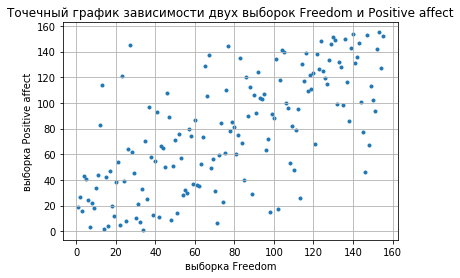

In [12]:
freedom = df_fr.Freedom
positive_affect = df_fr['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок Freedom и Positive affect')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')

In [14]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(freedom, positive_affect)
print(f'коэффициент Пирсона равен: {corr} знак коэфицента и его величина говорят о том, что \
существует прямая связь между переменными freedom и positive_affect')

коэффициент Пирсона равен: 0.6817698430601656 знак коэфицента и его величина говорят о том, что существует прямая связь между переменными freedom и positive_affect


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [17]:
# ценрализация
freedom_ = df_fr.Freedom
print(statistics.mean(freedom_))

freedom__1 = freedom_ - statistics.mean(freedom_)
print(statistics.mean(freedom__1))

# масштабироване
min(freedom__1)
max(freedom__1)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom__2 = min_max_scaler.fit_transform(np.array(freedom__1).reshape(-1, 1))
print(min(freedom__2))
print(max(freedom__2))


78.0
0.0
[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

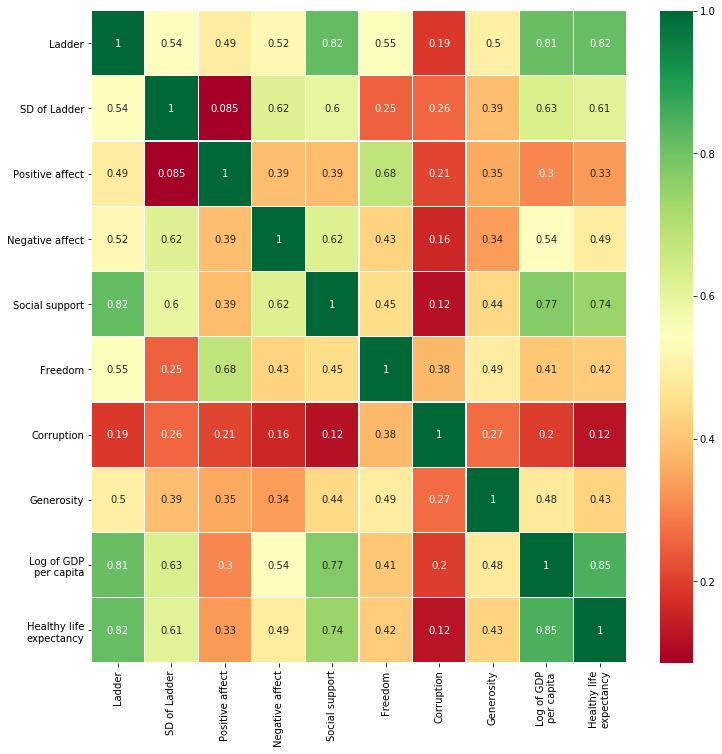

In [18]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()


Загрузить следующую таблицу: 

In [19]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

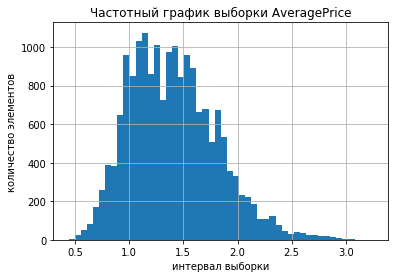

In [26]:
plt.hist(df.AveragePrice,50)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки AveragePrice')
plt.grid(True)
plt.show()

Распределение ближе к нормальному чем к равномерному

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

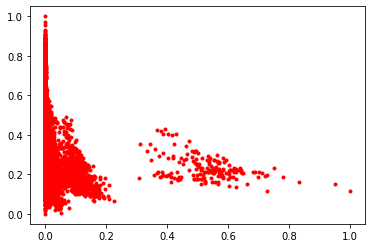

-0.2083170484878848
корреляция есть, она прямопопропорциональна и достаточно слабо выражена


In [30]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', 'AveragePrice']])
df_norm = pd.DataFrame(np_scaled)


plu_4046 = df_norm[0]
avPrice = df_norm[1]

plt.plot(plu_4046, avPrice, 'r.')
plt.show()
corr, p_value = pearsonr(plu_4046,avPrice)
print(corr)
print("корреляция есть, она прямопопропорциональна и достаточно слабо выражена")

18249